<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means II by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns
plt.style.use('fivethirtyeight')

### 1. Import the data

In [2]:
csv_file = 'ais.csv'
ais = pd.read_csv('ais.csv', index_col=0)

In [3]:
# Taking a peek
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [4]:
ais.sample(5)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
53,4.40,9.3,40.4,13.6,86,26.24,181.7,30.10,54.38,172.2,77.8,f,Netball
138,4.87,7.4,43.5,15.0,49,22.44,43.8,7.88,72.00,186.1,77.7,m,B_Ball
71,4.81,6.8,42.7,15.3,50,26.95,98.5,20.10,63.04,171.1,78.9,f,Field
44,3.96,5.5,36.3,12.4,71,22.63,101.1,17.93,55.97,173.6,68.2,f,Netball
143,4.93,7.3,46.2,15.1,41,21.12,34.0,6.59,67.00,184.4,71.8,m,T_400m


### 2. Do some EDA of relationships between features.

In [6]:
# Check for nulls
ais.isnull().sum()
# there is a value for every position in the DF

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

In [7]:
# Info about the dataset
ais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 32.1+ KB


In [8]:
# Numerical statistics about the dataset
ais.describe()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


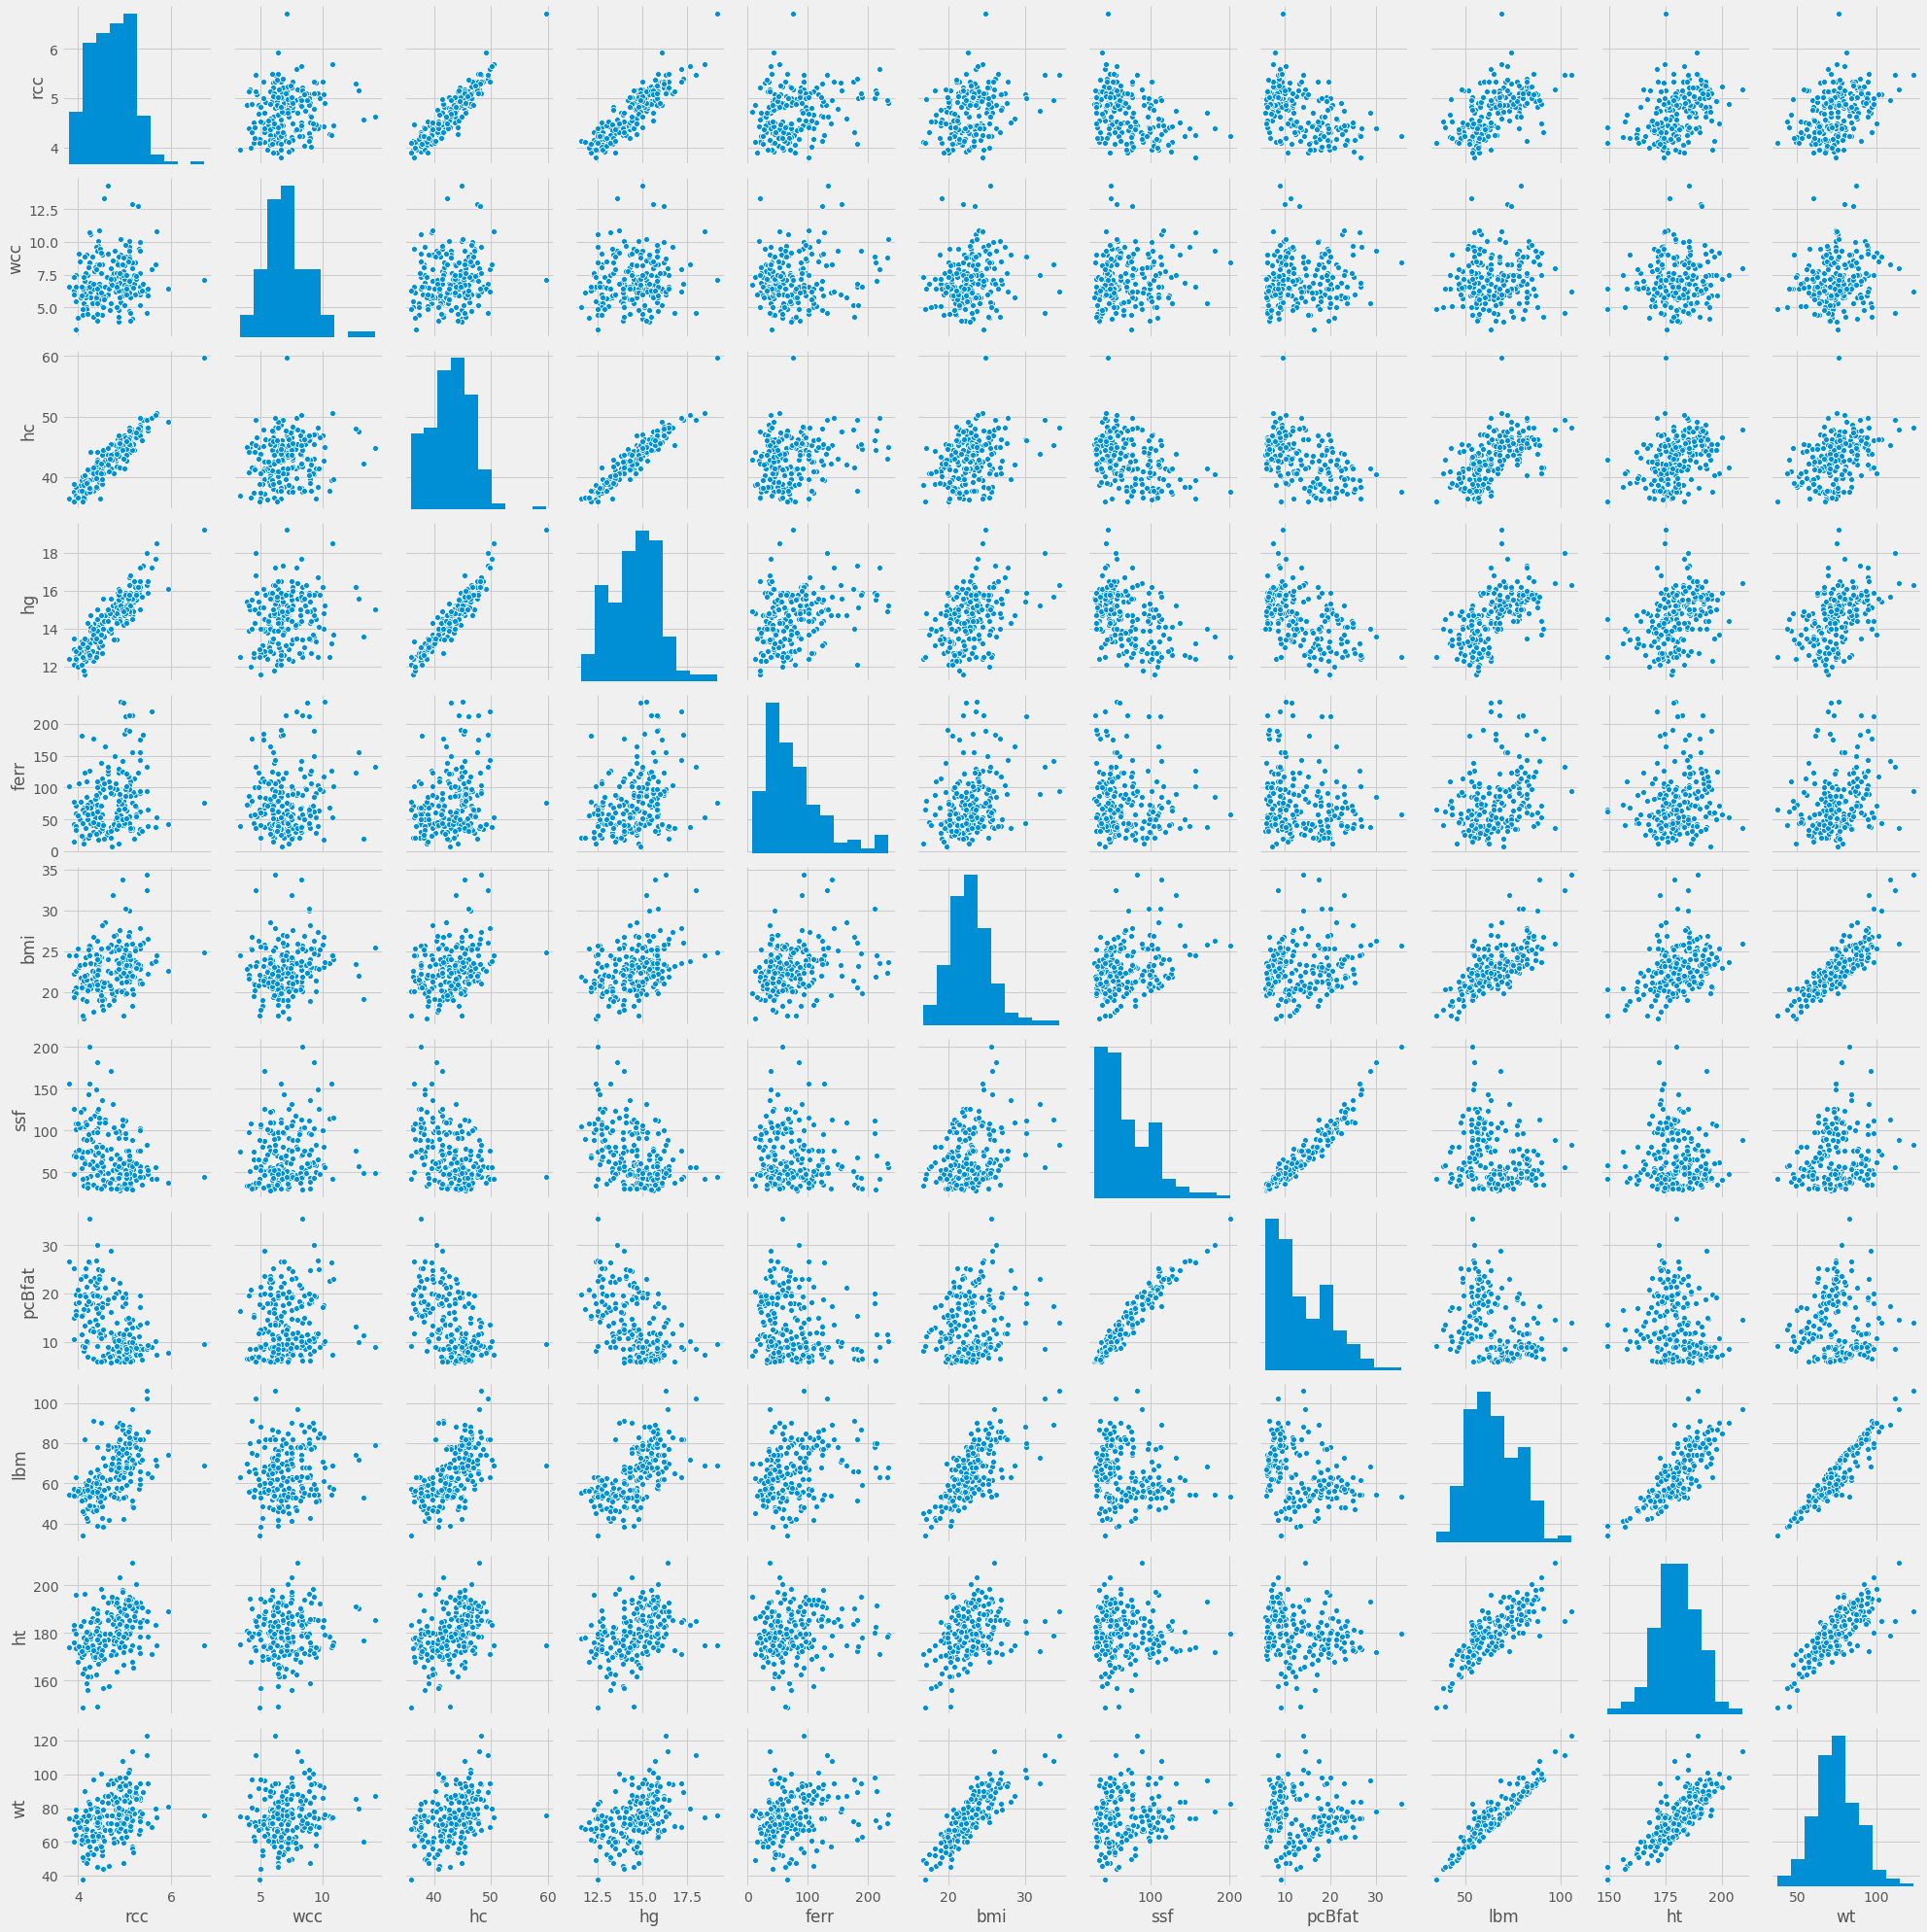

In [5]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot without the "sex" hue.
sns.pairplot(ais)

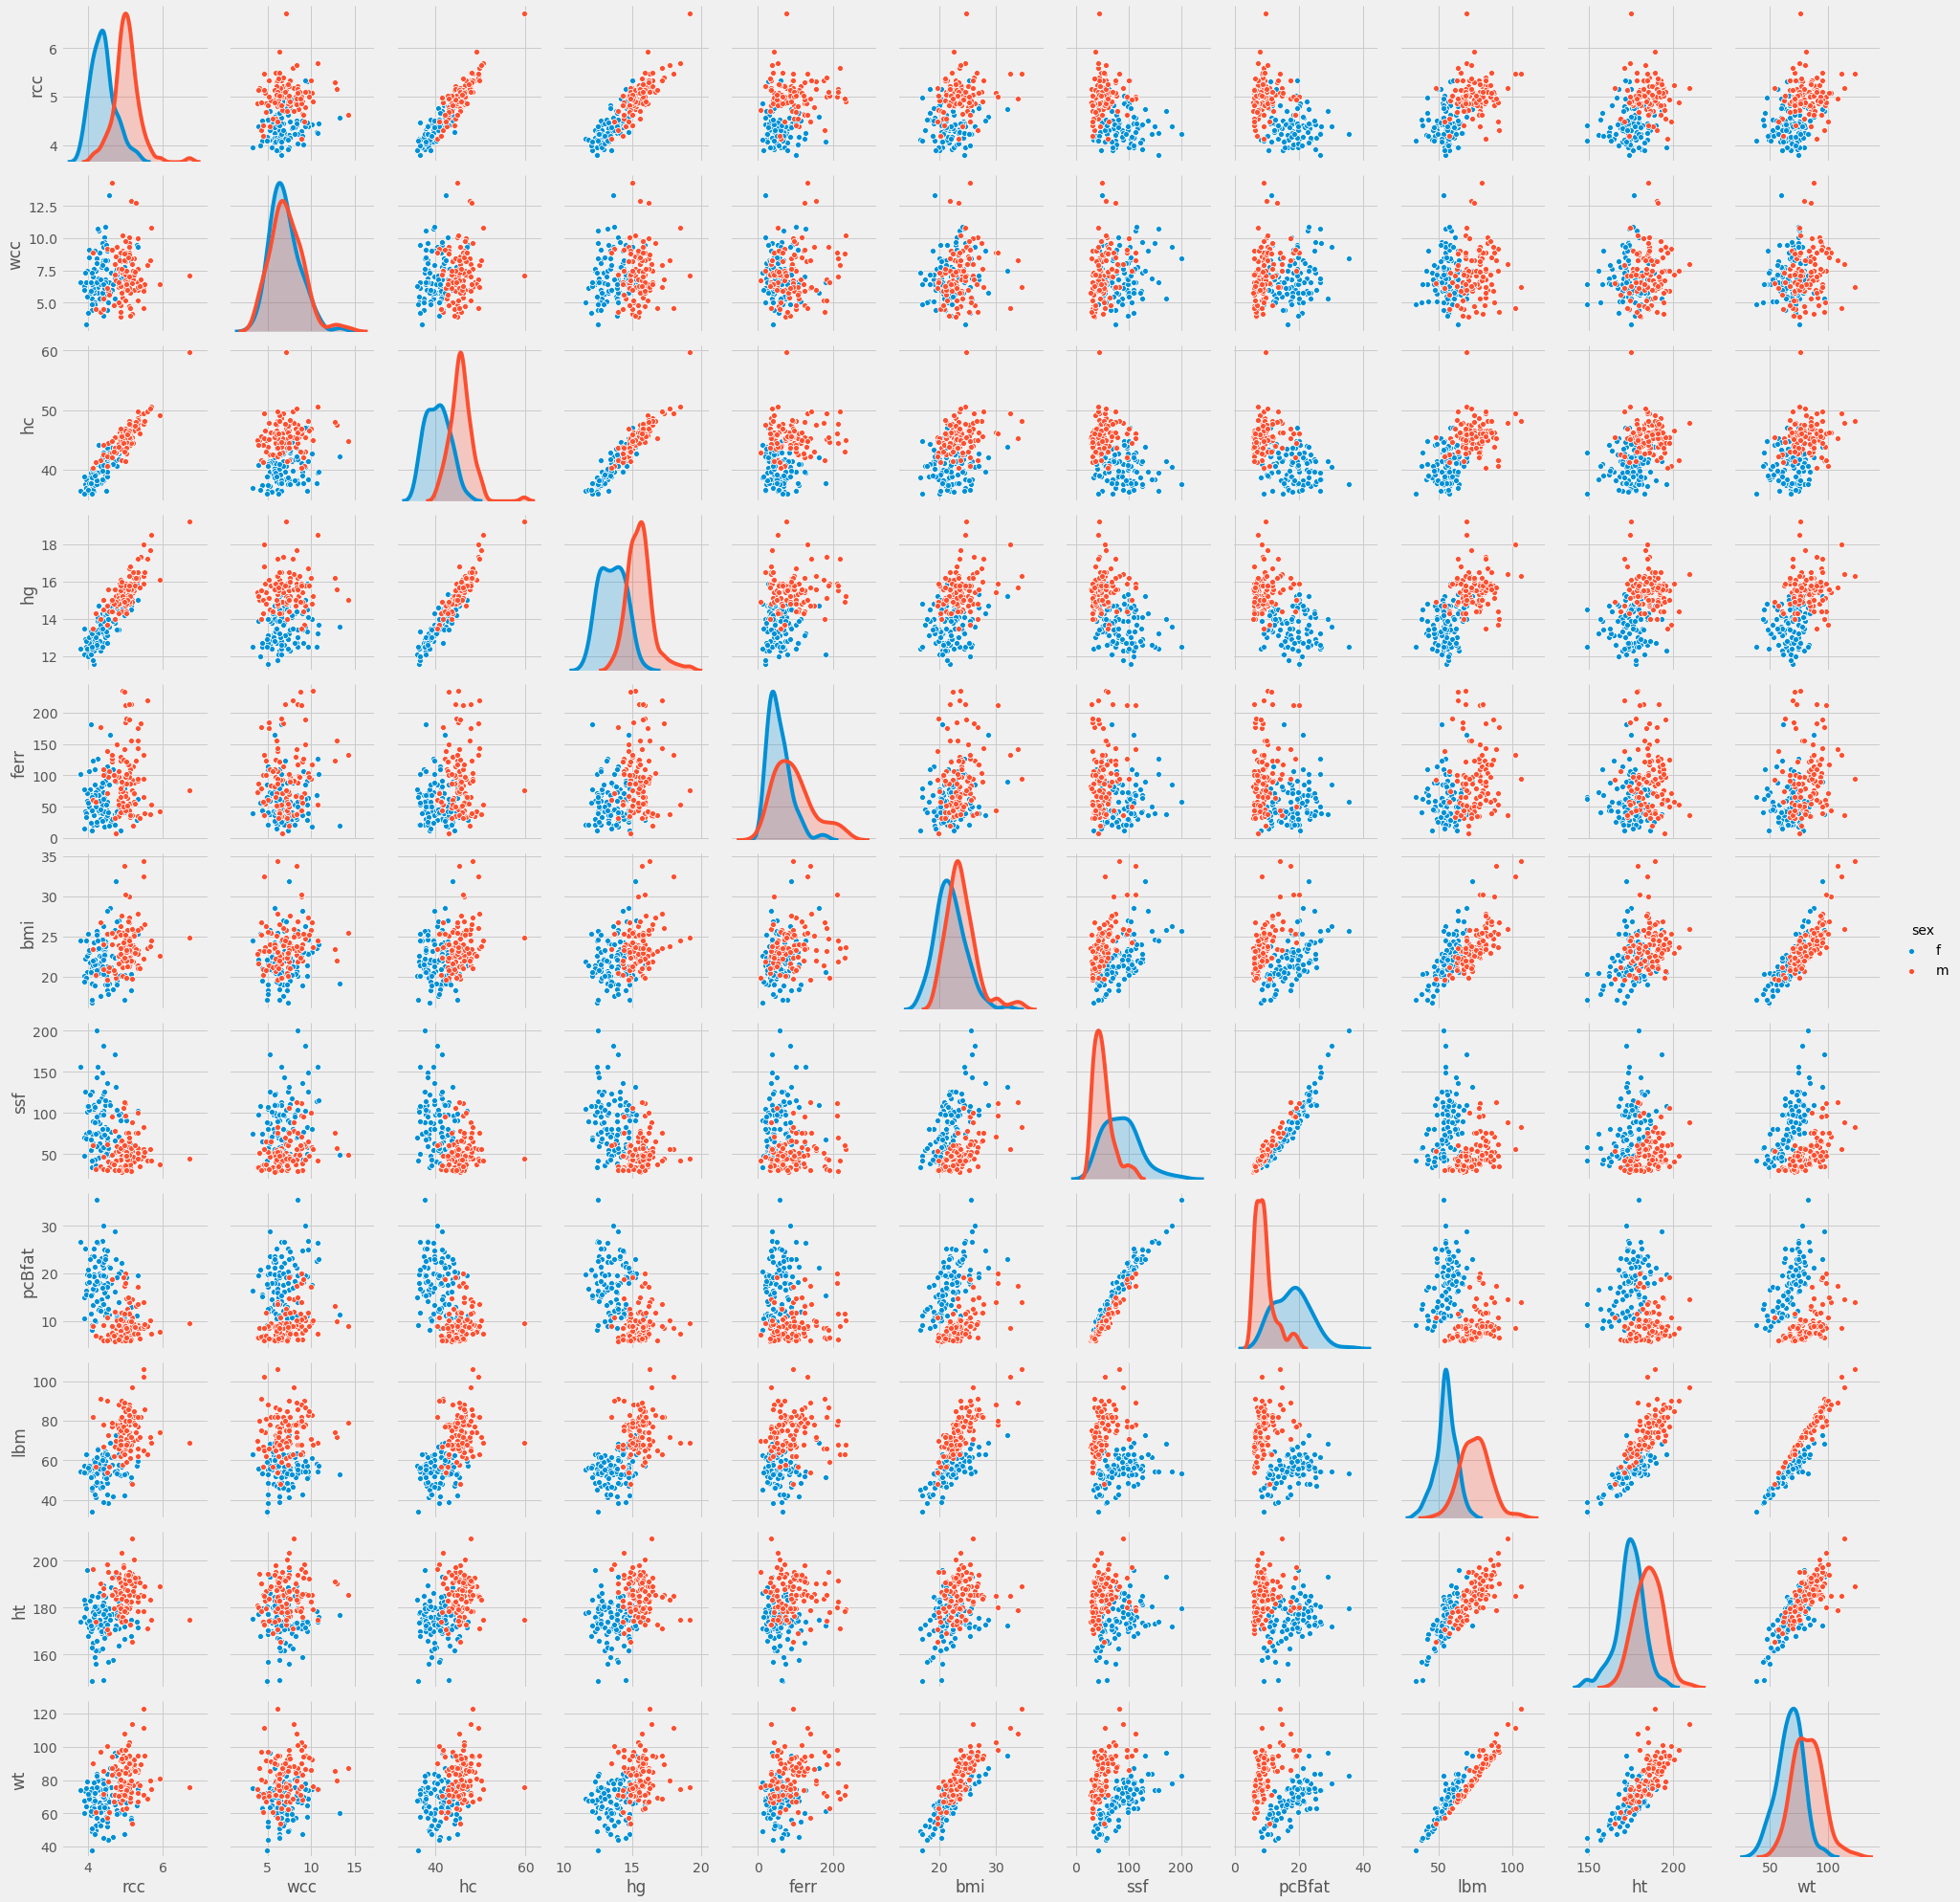

In [9]:
# Look at the real species labels.
sns.pairplot(data=ais, hue='sex')
# classea appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In [10]:
ais['sex'].value_counts()
# all classes are equally distributed. 

m    102
f    100
Name: sex, dtype: int64

In [11]:
# Check datatypes
ais.dtypes

rcc       float64
wcc       float64
hc        float64
hg        float64
ferr        int64
bmi       float64
ssf       float64
pcBfat    float64
lbm       float64
ht        float64
wt        float64
sex        object
sport      object
dtype: object

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [12]:
X = ais.drop(['sex', 'sport'], axis = 1)

# X = ais[['ht', 'wt']]
# y = seeds.sex

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xss = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [14]:
from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(Xss)

KMeans(n_clusters=2)

### 5. Get the Labels of each point 

In [15]:
# Labels for 2 Clusters
labels_2 = k_mean2.labels_
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
k_mean2.cluster_centers_

array([[ 0.70714441,  0.11404723,  0.72326046,  0.74397249,  0.4015262 ,
         0.42254737, -0.4658378 , -0.61749595,  0.78290521,  0.57003551,
         0.60358679],
       [-0.72128729, -0.11632817, -0.73772567, -0.75885194, -0.40955673,
        -0.43099832,  0.47515455,  0.62984587, -0.79856332, -0.58143622,
        -0.61565853]])

In [17]:
k_mean2.n_iter_

5

In [18]:
k_mean2.inertia_

1432.8802984104345

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the `inertia` attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [19]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

Plot the sum of squared distances vs. k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

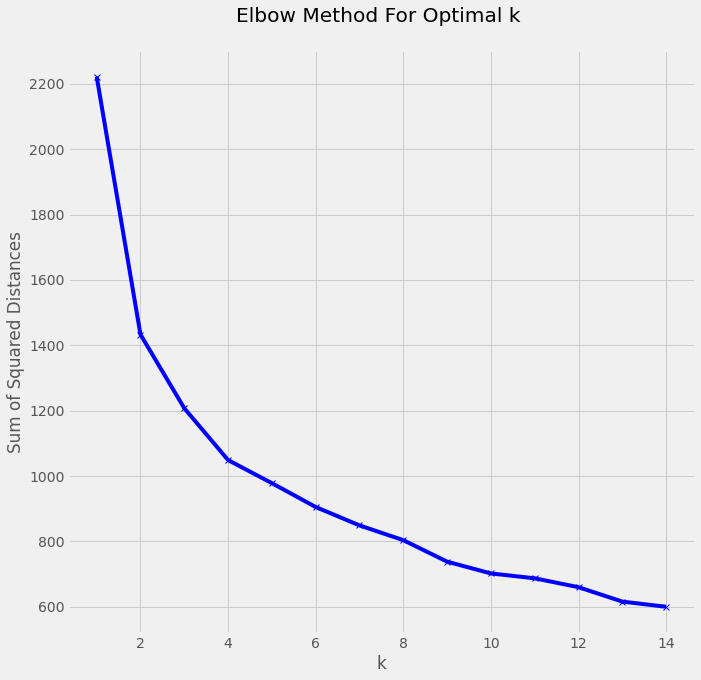

In [25]:
plt.figure(figsize=[10,10])
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k \n')
plt.show()

### 7. Plot `pcBfat` vs. `wt` using the clusters from each model.

- Plot pcBfat, wt using hue = sex
- Plot pcBfat, wt using hue = labels indentified by the model


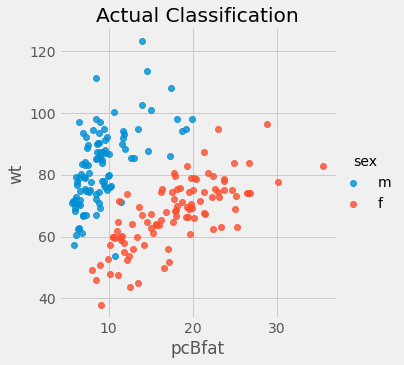

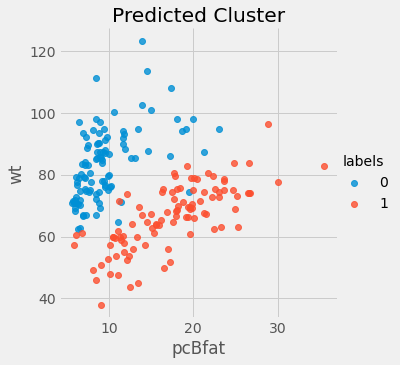

In [34]:

ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

Repeat for k = 4

In [ ]:
# KMeans algorithm 
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

In [38]:
# Labels for 2 Clusters
labels_4 = kmeans_model.labels_
print(labels_4)

[3 3 3 3 3 2 3 3 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 2 3 3 3 3 3 3 2 3
 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 2 2 3 3 0 0 2 2 2 2 2 1 3 3 3 3
 1 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 2 0 0 0 1 1 0 0
 0 0 0 2 2 0 2 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0]


In [39]:
kmeans_model.cluster_centers_

array([[ 7.93826923, 74.80961538],
       [11.9698    , 93.252     ],
       [11.82595238, 56.57142857],
       [21.04362069, 72.80862069]])

In [41]:
kmeans_model.n_iter_

13

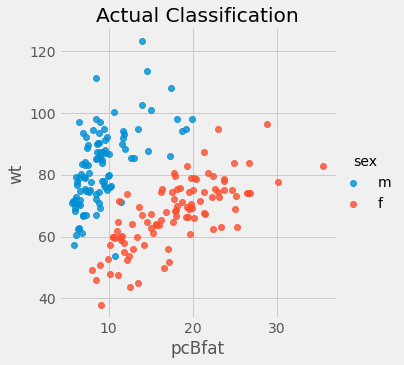

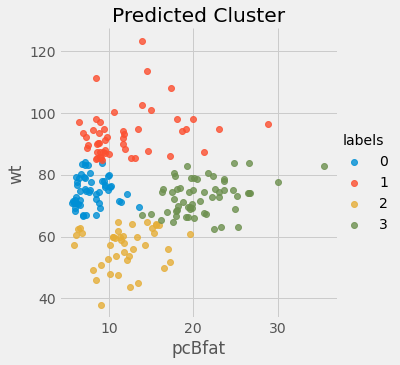

In [43]:

ais_labels = ais
ais_labels['labels'] = labels_4

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

[[ 7.93826923 74.80961538]
 [11.9698     93.252     ]
 [11.82595238 56.57142857]
 [21.04362069 72.80862069]]


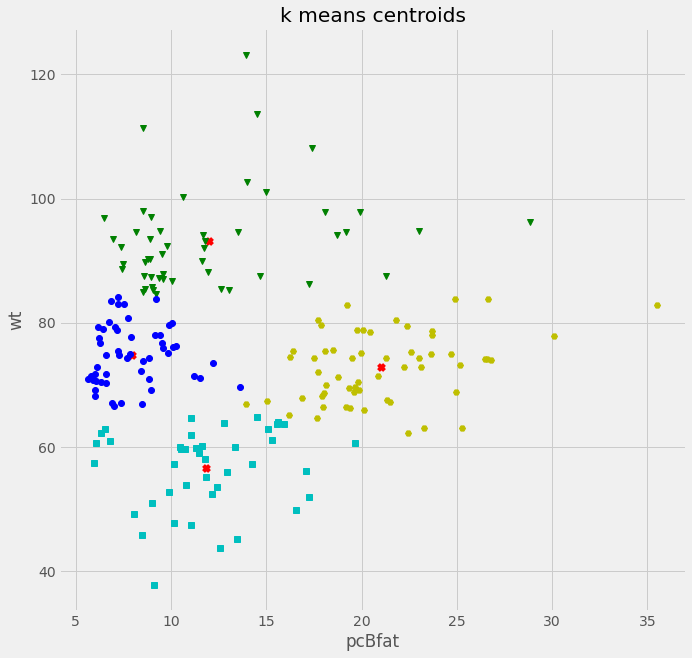

In [36]:
# Plot the graphical representation of the k means centroids:
print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.figure(figsize=[10,10])
plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



